In [522]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 읽기

In [523]:
import pandas as pd

# `use_log.csv` 고객의 센터 이용 이력 (2019.4 ~ 2019.3)
uselog = pd.read_csv('use_log.csv')

print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [524]:
# `customer_master.csv` 회원 데이터 (2019.3월 말 기준이며, 탈퇴 회원 포함) 
customer = pd.read_csv('customer_master.csv')

print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [525]:
# `class_master.csv` 회원권 구분 (종일 / 주간 / 야간)
class_master = pd.read_csv('class_master.csv')

print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [526]:
# `campaign_master.csv` 가입시 행사 종류 
campaign_master = pd.read_csv('campaign_master.csv')

print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


# 2. 데이터 병합
우선, uselog 데이터를 제외한 나머지 데이터들을 고객 데이터에 붙힙니다.

In [527]:
# class_master 데이터를 기준이 되는 customer 데이터에 붙힙니다. (공통 컬럼 = class)
customer_join = pd.merge(customer, class_master, on="class", how="left")

# 두 개를 붙힌 데이터에 추가로 campaign_master 데이터도 붙힙니다 (공통 컬럼 = campaign_id) 
customer_join = pd.merge(customer_join, campaign_master, on = "campaign_id")

# 확인하기 
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [528]:
# 전/후 데이터 갯수 비교 
print(len(customer))
print(len(customer_join))

4192
4192


In [529]:
# 결측치 생겼는지도 꼭 확인
print(customer.isnull().sum())

print(customer_join.isnull().sum())

# 참고로 end_date 에는 아직 탈퇴하지 않은 회원들이 있기때문에 NaN가 있을수밖에 없다.

customer_id       0
name              0
class             0
gender            0
start_date        0
end_date       2842
campaign_id       0
is_deleted        0
dtype: int64
customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64


# 3. 데이터 집계

# 3.1 고객데이터 훑어보기 

In [530]:
customer_join.head()

# 해당데이터로 무엇을 집계할 수 있을지 생각해봅니다. 

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [531]:
# 어떤 회원권이 제일 사람이 많을까요? 
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [532]:
# 입회비 할인 / 비할인 중에 어떨때 가입한 사람이 많을까요? 
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [533]:
# 여자가 더 많을까요? 남자가 더 많을까요?
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [534]:
# 탈퇴한 회원이 더 많을까요? 계속 다니고 있는 회원이 더많을까요?  (0이 현재 다니고 있는 회원들) 
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [535]:
print(customer_join["start_date"].min())
print(customer_join["start_date"].max())
print(customer_join["start_date"].dtype)

2015-05-01 00:00:00
2019-03-15 00:00:00
object


In [536]:
# 2019년 1월 1일 ~ 2019년 3월 14일 가입자와 
# 2018년 1월 1일 ~ 2018년 3월 14일 가입자 비교하기 

# 우선 start_date 컬럼이 object 인데 --> datetime 날짜형으로 바꿔줍니다. 
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
print(customer_join["start_date"].dtype)

datetime64[ns]


In [537]:
# 2019년 1월 1일 ~ 2019년 3월 14일 가입자 수

customer_start_2019 = customer_join.loc[
    (customer_join["start_date"] >= pd.to_datetime("2019-01-01")) 
     & 
    (customer_join["start_date"] <= pd.to_datetime("2019-03-14"))
]
print(customer_start_2019["start_date"].min())
print(customer_start_2019["start_date"].max())
len(customer_start_2019)

2019-01-01 00:00:00
2019-03-14 00:00:00


228

In [538]:
# 2018년 1월 1일 ~ 2018년 3월 14일 가입자 수 

customer_start_2018 = customer_join.loc[
    (customer_join["start_date"] >= pd.to_datetime("2018-01-01")) 
     & 
    (customer_join["start_date"] <= pd.to_datetime("2018-03-14"))
]
print(customer_start_2018["start_date"].min())
print(customer_start_2018["start_date"].max())
len(customer_start_2018)

# 2018년도 1분기 가입자수가 더 많습니다... 2019년도 1분기는 가입자 수가 다소 저조한것 같습니다. 

2018-01-01 00:00:00
2018-03-01 00:00:00


320

# 3.2 최신 고객 데이터 추출해서 집계

In [539]:
# 가장 최근 월(2019년 3월)의 고객데이터를 추출합니다. 
# 2019년 3월 31일까지 탈퇴한 고객 & 탈퇴하지 않은 고객을 추출해야합니다. 

# 먼저 탈퇴일 end_date 컬럼 = datetime 날짜형이기에 결측치가 있으면 NaT으로 표시됩니다.
pd.to_datetime(customer_join["end_date"])

# 즉, NaT 결측치값 == 3월 31일 기준 탈퇴하지 않은 고객

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4187   NaT
4188   NaT
4189   NaT
4190   NaT
4191   NaT
Name: end_date, Length: 4192, dtype: datetime64[ns]

In [540]:
# 위의 end_date 컬럼을 datetime 날짜형으로 바꿔준걸 저장해줍니다. 
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

In [541]:
# 3월 31일 기준 탈퇴하지 않은 고객들
# 탈퇴일이 2019년 3월 31일 이후이거나, 현재까지 다니는 사람들 

customer_join.loc[
    (customer_join["end_date"]>= pd.to_datetime("20190401")) 
    |
    (customer_join["end_date"].isna())
]

# 위에거를 저장해줍니다. 
customer_keep = customer_join.loc[
    (customer_join["end_date"]>= pd.to_datetime("20190401")) 
    |
    (customer_join["end_date"].isna())
]
customer_keep.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반


In [542]:
# 3월 31일 기준 탈퇴하지 않은 고객들
# 몇 명일까요?

print(len(customer_keep))

2842


In [543]:
# 3월 31일 기준 탈퇴한 고객들
customer_quit = customer_join.loc[
    (customer_join["end_date"] <= pd.to_datetime("20190401")) 
    |
    (customer_join["end_date"].isna())
]
print(len(customer_quit))

4192


In [544]:
# 3월 31일 기준 탈퇴하지 않은 고객들 기준으로 다시 알아봅니다.   

# 3월 31일 기준 탈퇴하지 않은 고객들 / 회원권 비교 
customer_keep.groupby("class_name").count()["customer_id"]

# 종일권 > 야간권 > 주간권 순으로 많다. 

class_name
0_종일    1381
1_주간     675
2_야간     786
Name: customer_id, dtype: int64

In [545]:
# 3월 31일 기준 탈퇴하지 않은 고객들 / 가입당시 이벤트 비교 
customer_keep.groupby("campaign_name").count()["customer_id"]

# 할인안한 일반권이 훨씬 많다.

campaign_name
0_입회비반액할인     282
1_입회비무료       219
2_일반         2341
Name: customer_id, dtype: int64

In [546]:
# 3월 31일 기준 탈퇴하지 않은 고객들 / 성별 비교 
customer_keep.groupby("gender").count()["customer_id"]

# 비슷하지만 남자가 쪼금 더 많다.

gender
F    1352
M    1490
Name: customer_id, dtype: int64

# 4. 이용 이력 데이터 집계

# 4.1 훑어보기

In [547]:
# 이용 이력 데이터에는 2018년 4월부터 2019년 3월까지의 
# 고객별로 언제 방문했었는지 나타내는 데이터입니다. 

uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [548]:
uselog.info()  

# 결측값은 없습니다. 
# 다만, usedate 이용날짜컬럼이 datetime 날짜형으로 바꿔줘야 합니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [549]:
# 날짜형으로 바꿉니다.
uselog["usedate"] = pd.to_datetime(uselog["usedate"])

# yyyymm 만 표시되는 컬럼을 추가생성합니다. 
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")

uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   log_id       197428 non-null  object        
 1   customer_id  197428 non-null  object        
 2   usedate      197428 non-null  datetime64[ns]
 3   연월           197428 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 6.0+ MB


# 4.2 고객별 월 이용 횟수

In [550]:
# yyyymm 별 회원별 이용 수
uselog.groupby(["연월", "customer_id"]).count()

log_id  usedate
연월     customer_id                 
201804 AS002855          4        4
       AS009013          2        2
       AS009373          3        3
       AS015315          6        6
       AS015739          7        7
...                    ...      ...
201903 TS995853          8        8
       TS998593          8        8
       TS999079          3        3
       TS999231          6        6
       TS999855          4        4

[36842 rows x 2 columns]

In [551]:
# yyyymm 별로 회원 수 
uselog.groupby(["연월", "customer_id"], as_index = False).count()
#                                      --------- 일반 컬럼화 
# 를 변수로 저장해주기 

uselog_month = uselog.groupby(["연월", "customer_id"], as_index = False).count()
uselog_month.head()

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [552]:
# log_id 컬럼을 count로 수정해주기 
uselog_month.rename(columns={"log_id":"count"}, inplace=True)
uselog_month.head()

,연월,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [553]:
# 필요없는 usedate 컬럼 제거해주기 
del uselog_month["usedate"]

uselog_month.head()

# AS002855 고객은 2018년 4월에 총 4번 이용하셨네요. 

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [554]:
# 고객별로 월 이용 횟수 집계 (평균값, 중앙값, 최대값, 최솟값)

uselog_month.groupby("customer_id")['count'].agg(["mean", "median", "max", "min"])

# 이것을 변수에 저장 
uselog_customer = uselog_month.groupby("customer_id")['count'].agg(["mean", "median", "max", "min"])
uselog_customer.head()

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4


In [555]:
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

# 고객별 월 이용 횟수 집계입니다. 

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


# 4.3 정기적으로 방문하는지 여부 

In [556]:
uselog.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [557]:
# usedate 방문날짜 컬럼을 통해 요일 추출 
uselog["usedate"].dt.weekday  

# 0 월요일 / 1 화요일 ~ 6 토요일  / 6 일요일  
pd.unique(uselog["usedate"].dt.weekday )

array([6, 0, 1, 2, 3, 4, 5], dtype=int32)

In [558]:
# 요일 컬럼 추가 
uselog["weekdays"] = uselog["usedate"].dt.weekday  
uselog.head()

,log_id,customer_id,usedate,연월,weekdays
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [559]:
# 각 고객별 연월별 요일별로   --> groupby(["customer_id", "연월", "weekdays"]) 
# 이용횟수를 세 봅니다.      --> .count()

uselog.groupby(["customer_id", "연월", "weekdays"], as_index=False).count()
#      ------------------------------------------

,customer_id,연월,weekdays,log_id,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [560]:
# 보고 싶은 컬럼만 보겠습니다. 뒤에 [[  여기 안에 보고싶은 컬럼만   ]] 

uselog.groupby(["customer_id", "연월", "weekdays"], as_index=False).count()[["customer_id", "연월", "weekdays", "log_id"]]
#       -------------------------------------- 세 컬럼 그룹화 --개별row화 --갯수셈 ---------------------------네 컬럼만 보여줘 

# 그리고 이걸 저장 
uselog_weekdays = uselog.groupby(["customer_id", "연월", "weekdays"], as_index=False).count()[["customer_id", "연월", "weekdays", "log_id"]]
uselog_weekdays.head()

,customer_id,연월,weekdays,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [561]:
# 헷갈리니 이용횟수 log_id 컬럼명을 count로 정정합니다. 
uselog_weekdays.rename(columns = {"log_id":"count"}, inplace = True)
uselog_weekdays.head()

,customer_id,연월,weekdays,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [562]:
# 알아보기 쉽게끔 weekdays를 한글 요일로 변환하여 K_days 컬럼 추가
uselog_weekdays["K_days"] = uselog_weekdays["weekdays"].map({
    0: "월", 1: "화", 2: "수", 3: "목", 4: "금", 5: "토", 6: "일"
})
uselog_weekdays.head()

# AS002855 회원의 경우 2018년 4월 토요일에는 4번 방문, 5월 토요일에도 4번 방문, 6월 토요일에는 5번 방문하셨군요. 
# 매주 토요일마다 오시는 편이네요. 

,customer_id,연월,weekdays,count,K_days
0,AS002855,201804,5,4,토
1,AS002855,201805,2,1,수
2,AS002855,201805,5,4,토
3,AS002855,201806,5,5,토
4,AS002855,201807,1,1,화


In [563]:
# 각 회원별로 어느 요일에 가장 많이 오는지 알아봅니다. (최대값 찾기) 
uselog_weekdays.groupby("customer_id", as_index=False).max().head()

,customer_id,연월,weekdays,count,K_days
0,AS002855,201903,6,5,화
1,AS008805,201903,6,4,화
2,AS009013,201804,0,2,월
3,AS009373,201903,6,5,화
4,AS015233,201903,6,5,화


In [564]:
# 위에걸 저장합니다.
# 단!! 필요 컬럼 2개만 저장합니다. 
uselog_weekdays = uselog_weekdays.groupby("customer_id", as_index=False).max()[["customer_id","K_days", "count"]]
uselog_weekdays.head()

,customer_id,K_days,count
0,AS002855,화,5
1,AS008805,화,4
2,AS009013,월,2
3,AS009373,화,5
4,AS015233,화,5


In [565]:
# 어떤 달의 특정 요일에 매주 정기적으로 방문하는지 알아봅니다. 
# 이용 횟수가 4이상 되어야 매주 오는거겠죠... count값이 4이상되면 "1" 로 , 아니라면 "0" 으로 표시하는 컬럼 추가 

# 우선 0으로 다 통일해서 만들어버림 
uselog_weekdays["almost_visit"] = 0

# 그 다음 count값이 4 이상이면 "1" 로 변경 
uselog_weekdays["almost_visit"] = uselog_weekdays["almost_visit"].where(uselog_weekdays["count"]<4, 1)
uselog_weekdays.head()

,customer_id,K_days,count,almost_visit
0,AS002855,화,5,1
1,AS008805,화,4,1
2,AS009013,월,2,0
3,AS009373,화,5,1
4,AS015233,화,5,1


In [594]:
# 정기적으로 이용하는 회원의 수 
# almost_visit별로 묶어서, 고객수 세기 

uselog_weekdays.groupby("almost_visit").count()["customer_id"]
# 다행히 한달에 특정요일을 4회이상 꾸준히 방문함을 뜻하는 "1"이 훨씬 많네요.

almost_visit
0     779
1    3413
Name: customer_id, dtype: int64

# 5. 고객데이터와 이용데이터 합치기

# 5.1 병합

In [566]:
# 고객별 월별 이용횟수 집계 
uselog_customer.head()      

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [567]:
# 고객별 요일별 이용횟수 집계
uselog_weekdays.head()

,customer_id,K_days,count,almost_visit
0,AS002855,화,5,1
1,AS008805,화,4,1
2,AS009013,월,2,0
3,AS009373,화,5,1
4,AS015233,화,5,1


In [568]:
# 고객 최종 데이터 
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반


In [571]:
# 기준이 되는 customer_join 데이터에 uselog_customer 데이터 붙혀넣기
two_data = pd.merge(customer_join, uselog_customer, on ="customer_id", how="left")
two_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1


In [572]:
# 병합후에는 꼭 결측값이 없는지 갯수를 확인하세요
print(len(two_data))
print(uselog_customer.isnull().sum())
print(uselog_weekdays.isnull().sum())
print(customer_join.isnull().sum())
print(two_data.isnull().sum())

4192
customer_id    0
mean           0
median         0
max            0
min            0
dtype: int64
customer_id     0
K_days          0
count           0
almost_visit    0
dtype: int64
customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64
customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
dtype: int64


In [573]:
# 병합 데이터 two_data 에 uselog_weekdays 를 또 추가해줍니다. 
total_data = pd.merge(two_data, uselog_weekdays[["customer_id", "almost_visit"]], on="customer_id",how="left")
total_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,almost_visit
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [574]:
# 병합후에는 꼭 결측값이 없는지 갯수를 확인하세요
print(len(total_data))
print(len(two_data))

4192
4192


In [575]:
print(two_data.isnull().sum())
print(total_data.isnull().sum())

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
dtype: int64
customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
almost_visit        0
dtype: int64


# 5.2 날짜 사이의 구간 계산

In [576]:
total_data["end_date"].head()

# 날짜형 컬럼의 경우 결측치가 NaT으료 표시된다. 
# 즉, 아직 탈퇴하지 않은 회원들은 NaT 으로 표시된다. 

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: end_date, dtype: datetime64[ns]

In [577]:
total_data["end_date"].isnull().sum()

# 아직 탈퇴하지 않은 회원들은 2842명이다. 
# 이들을 데이터 시점 기준 한 달 뒤 미래인 2019년 4월 30일 값으로 넣어준다. 

2842

In [578]:
# 일단 end_date 그대로 복사 
total_data["end_date_calc"] = total_data["end_date"]

# 그리고 그 중에 결측값만 교체 
total_data["end_date_calc"] = total_data["end_date_calc"].fillna(
    pd.to_datetime("20190430")
)
total_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,almost_visit,end_date_calc
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30


In [586]:
# end_date_calc 날짜 - start_date 날짜 계산 = 이용한 달의 갯수 (월 단위 이용기간)

# 날짜계산 함수 dateutil라이브러리의 relativedelta 를 이용합니다. 
from dateutil.relativedelta import relativedelta

# 우선 해당 컬럼에 0을 추가해서 하나씩 계산해서 넣는다. 
total_data["membership_period"] = 0

# 하나씩 total_data의 row별로 하나씩 꺼내서 
for i in range(len(total_data)):
    
    # end_date_calc 날짜값과 start_date 날짜값의 두 간격을 계산한 후 delta 변수에 저장 
    delta = relativedelta(total_data["end_date_calc"].iloc[i], total_data["start_date"].iloc[i])
    
    # 여기서 끝내면 그저 0만 나온다. 

    # 그리고 날짜 간격을 계산한 delta 변수를 추출하여 """월 단위로 변환""" 해서 하나씩 저장한다. 
    # delta.year == 두 날짜간의 연도 차이이며 만약에 2 라면 2년 == 24개월 이므로 * 12 를 해줘야 한다. 
    # delta.months == 두날짜간의 개월 차이이며 만약 6 라면 6개월 
    total_data["membership_period"].iloc[i] = delta.years*12 + delta.months

total_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,almost_visit,end_date_calc,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


# 6. 통계량 파악 

In [591]:
total_data.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,almost_visit,end_date_calc,membership_period
count,4192,1350,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192,4192.000000
mean,2017-07-06 19:43:44.427480832,2018-10-17 16:23:28,0.322042,8559.875954,5.333127,5.250596,7.823950,3.041269,0.814170,2019-02-26 10:07:19.694656512,18.835878
min,2015-05-01 00:00:00,2018-04-30 00:00:00,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2016-09-01 00:00:00,2018-06-30 00:00:00,0.000000,6000.000000,4.250000,4.000000,7.000000,2.000000,1.000000,2019-01-31 00:00:00,7.000000
50%,2017-09-01 00:00:00,2018-10-31 00:00:00,0.000000,7500.000000,5.000000,5.000000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,15.000000
75%,2018-05-12 00:00:00,2019-01-31 00:00:00,1.000000,10500.000000,6.416667,6.500000,9.000000,4.000000,1.000000,2019-04-30 00:00:00,30.000000
max,2019-03-15 00:00:00,2019-03-31 00:00:00,1.000000,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.467315,1968.128971,1.777533,1.874874,2.168959,1.951565,0.389016,NaN,13.848148


In [592]:
# 필요 컬럼만 추출 
# 고객의 매월 이용횟수 평균값 mean
# 고객의 매월 이용횟수 중앙값 median
# 고객의 매월 이용횟수 최대값 max
# 고객의 매월 이용횟수 최소값 min

total_data[["mean","median","max","min"]].describe()

# 고객 한 사람당 월별 평균 이용 횟수는 5.333127로서 약 5회입니다. 
# 다행히 평균값과 중앙값이 거의 차이가 나지 않네요. 

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


# 7. 시각화

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

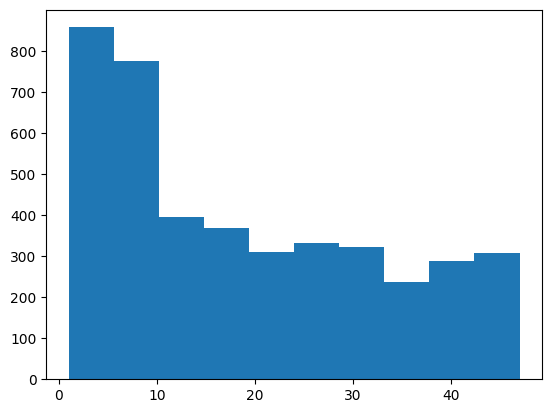

In [600]:
# 시각화 
import matplotlib.pyplot as plt

# bar 그래프로 기간별로 시각화 
plt.hist(total_data["membership_period"])

# 10개월 미만 이용하는 회원수가 가장 많네요. 

# 8. 파일로 저장 

In [601]:
total_data.to_csv("total_data.csv",index=False)